In [9]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [10]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [18]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy import create_engine, func

In [19]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [20]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(autoload_with=engine)

In [21]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [22]:
# Save references to each table
measurement = base.classes.measurement

station = base.classes.station

In [23]:
# Create our session (link) from Python to the DB
# Create a configured 'Session' class
Session = sessionmaker(bind=engine)

# Create a session
session = Session()

# Exploratory Precipitation Analysis

In [28]:
# Find the most recent date in the data set.
last_row = session.query(measurement).order_by(measurement.date.desc()).first()
print(last_row.__dict__['date'])

2017-08-23


<Axes: xlabel='Date', ylabel='Inches'>

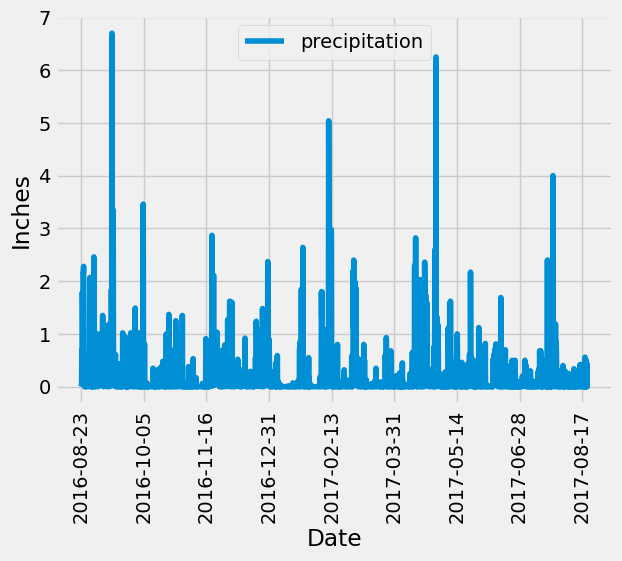

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = dt.datetime.strptime(last_row.__dict__['date'], '%Y-%m-%d')
end_date = dt.date(most_recent_date.year - 1, most_recent_date.month, most_recent_date.day)

# Perform a query to retrieve the data and precipitation scores
data = [measurement.date, measurement.prcp]
filtered_data = session.query(*data).filter(measurement.date >= end_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df=pd.DataFrame(filtered_data, columns=["date","precipitation"])
prcp_df=prcp_df.dropna(how='any')
# Sort the dataframe by date

prcp_df=prcp_df.sort_values(["date"], ascending=True)
prcp_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df=prcp_df.set_index('date')
prcp_df.head()
prcp_df.plot(xlabel="Date",ylabel="Inches",rot=90)

In [37]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [40]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(station.id).distinct().count()
print(stations)

9


In [42]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
count_by_stations=session.query(measurement.station.distinct(), func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
count_by_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station=count_by_stations[0][0]
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == most_active_station).all()

[(54.0, 85.0, 71.66378066378067)]

<Axes: xlabel='Temperature', ylabel='Frequency'>

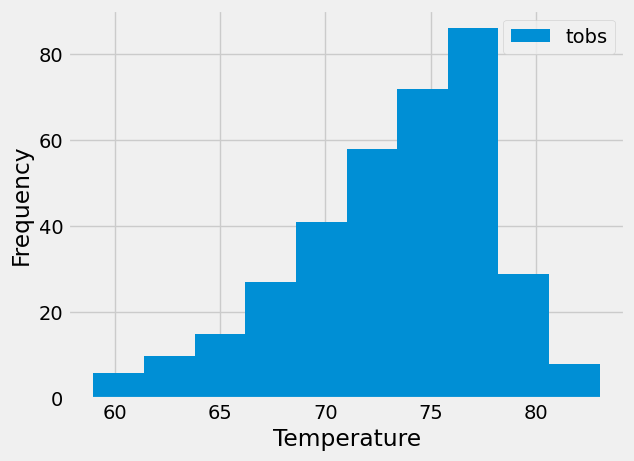

In [44]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data = [measurement.date, measurement.tobs]
filtered_data = session.query(*data).filter(measurement.date >= end_date, measurement.station == most_active_station).all()
tobs_df=pd.DataFrame(filtered_data, columns=["date","tobs"])
tobs_df=tobs_df.dropna(how='any')
tobs_df=tobs_df.set_index('date')
tobs_df.plot(kind="hist",xlabel="Temperature")

# Close Session

In [45]:
# Close Session
session.close()